In [ ]:
from typing import List
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

def BlackScholesPaths(
    S_0: float, 
    r: float, 
    sigma: float, 
    T: float, 
    N: int, 
    n: int,
    rng: np.random.Generator
):
    delta = T / N
    Z = rng.normal(loc=0, scale=1, size=(n, N))
    path = np.empty((n, N + 1), dtype=np.float64)
    path[:, 0] = S_0
    for i in range(N):
        path[:, i + 1] = path[:, i] * np.exp((r - 0.5 * np.power(sigma, 2.0)) * delta + sigma * np.sqrt(delta) * Z[:, i])
    return path

def BlackScholesFinal(
    S_0: float, 
    r: float, 
    sigma: float, 
    T: float, 
    N: int, 
    n: int,
    rng: np.random.Generator
):
    
    pass

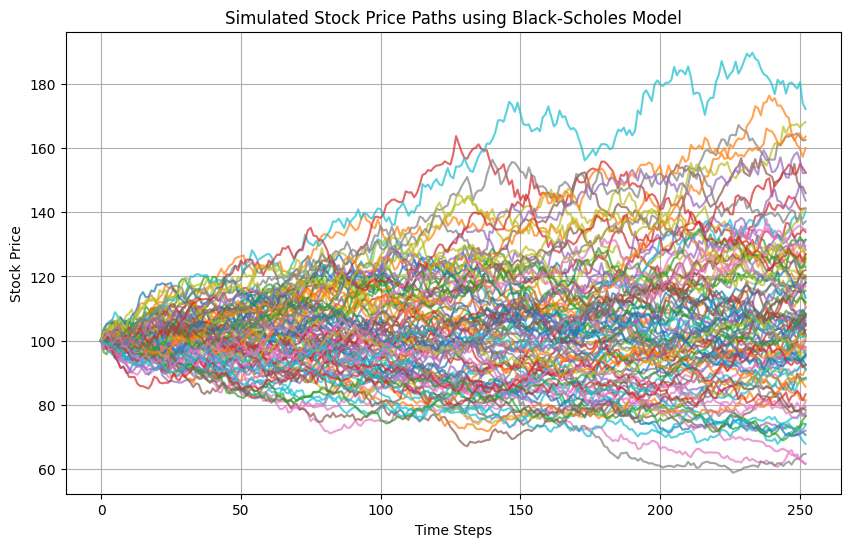

In [ ]:

S_0 = 100
r = 0.05
sigma = 0.2
T = 1.0
N = 252
n = 100_000
rng = np.random.default_rng(42)
paths = BlackScholesPaths(S_0, r, sigma, T, N, n, rng)

plt.figure(figsize=(10, 6))
for i in range(min(100, n)):
    plt.plot(paths[i], alpha=0.7)

plt.title("Simulated Stock Price Paths using Black-Scholes Model")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.grid(True)
plt.show()

In [17]:
final_values = paths[:, -1]

average_final = np.mean(final_values)
median_final = np.median(final_values)
std_final = np.std(final_values)

print(f"Average: {average_final:.2f}, median: {median_final:.2f}, std: {std_final:.2f}")

Average: 105.14, median: 103.06, std: 21.24
